---
title: EOPF Xarray compatibility
subtitle: Investigate the current compatibility between Zarray and the EOPF Zarr format
authors:
  - name: Michele Claus
    orcid: 0000-0003-3680-381X
    github: clausmichele
    affiliations:
      - id: Eurac Research
        institution: Eurac Research
        ror: 01xt1w755
  - name: Juraj Zvolenský
    orcid: 0009-0000-9185-7955
    github: jzvolensky
    affiliations:
      - id: Eurac Research
        institution: Eurac Research
date: 2025-02-03
thumbnail: https://raw.githubusercontent.com/EOPF-Sample-Service/eopf-sample-notebooks/refs/heads/main/notebooks/static/ESA_logo_2020_Deep.png
keywords: ["earth observation", "remote sensing"]
tags: ["xarray"]
releaseDate: 2025-02-03
datePublished: 2025-02-03
dateModified: 2025-02-03
---

```{image} ../static/ESA_logo_2020_Deep.png
:alt: ESA Logo
:width: 250px
:align: center
```

## Table of contents

- [Introduction](#Introduction)
- [Setup](#Setup)
- [Read EOPF Zarr with Xarray](#Read-EOPF-Zarr-with-Xarray)
- [Plotting the data](#Plotting-the-data)
- [Export to Zarr](#Export-to-Zarr)
- [Opening data using EOPF-CPM](#Opening-data-using-EOPF-CPM)
- [Loading the data](#Loading-the-data)

(Introduction)=
## Introduction

This notebook is used to showcase the compatibility of EOPF CPM with Xarray.

:::{hint} Overview
**Questions**
- What is this notebook doing?
  - The notebook provides examples of opening data with EOPF and Xarray
- Why is it useful?
  - It is useful to understand how and if it is possible to use EOPF with Xarray.

**Objectives**
- Demonstrate data handling with both EOPF CPM and Xarray
- Compare and highlight potential differences
:::

(Setup)=
## Setup
Start importing the necessary libraries

In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
from eopf.store.zarr import EOZarrStore

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 10

(Read-EOPF-Zarr-with-Xarray)=
## Read EOPF Zarr with Xarray
Sample code reading a Sentinel-1 GRD product from https using xarray

In [2]:
remote_product_path = "https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/grd/S01SIWGRH_20240201T164915_0025_A146_S000_5464A_VH.zarr"
grd = xr.open_zarr(remote_product_path, group="measurements")["grd"]
grd

<xarray.DataArray 'grd' (azimuth_time: 16675, ground_range: 26456)> Size: 2GB
dask.array<open_dataset-grd, shape=(16675, 26456), dtype=float32, chunksize=(16675, 26456), chunktype=numpy.ndarray>
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 133kB 2024-02-01T16:49:15.722...
  * ground_range  (ground_range) float64 212kB 0.0 10.0 ... 2.645e+05 2.646e+05
    line          (azimuth_time) int64 133kB dask.array<chunksize=(16675,), meta=np.ndarray>
    pixel         (ground_range) int64 212kB dask.array<chunksize=(26456,), meta=np.ndarray>
Attributes: (12/28)
    ascending_node_time:                 2024-02-01T16:38:33.596595
    azimuth_pixel_spacing:               10.0
    azimuth_time_interval:               0.001499231873605405
    family_name:                         SENTINEL-1
    geospatial_bounds:                   POLYGON((18.62418337217432 39.866520...
    geospatial_lat_max:                  41.36716535718914
    ...                                  ...
    relative_orbit_number:               146
    start_time:                          2024-02-01T16:49:15.722819
    stop_time:                           2024-02-01T16:49:40.721011
    swaths:                              ['IW']
    transmitter_receiver_polarisations:  ['VV', 'VH']
    units:                               1

(Plotting-the-data)=
## Plotting the data
Create a sample plot of the data

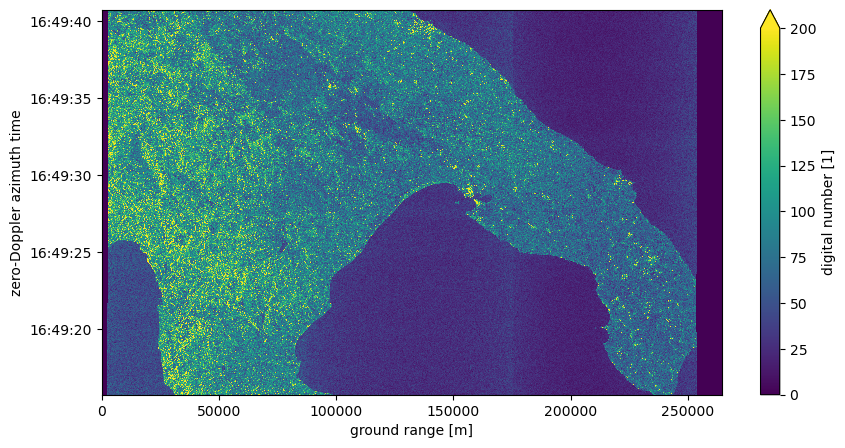

In [3]:
grd_decimated = grd.isel(
    azimuth_time=slice(None, None, 10), ground_range=slice(None, None, 10)
)

grd_decimated.plot(vmax=200)
plt.show()

(Export-to-Zarr)=
## Export to Zarr

In [5]:
output_path = "../../data/test_subset.zarr"
grd_decimated.to_zarr(output_path)

(Reopen-the-data)=
## Reopen the data

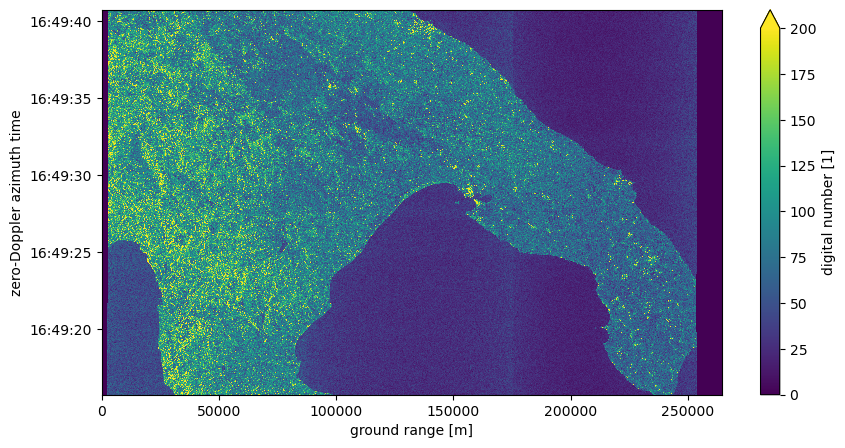

In [6]:
verify_subset = xr.open_zarr(output_path)
verify_subset
verify_subset["grd"].plot(vmax=200)
plt.show()

(Opening-data-using-EOPF-CPM)=
## Opening data using EOPF-CPM

In [7]:
local_data_path = "../../data/test_subset.zarr"

store = EOZarrStore(url=local_data_path).open()
store

(Loading-the-data)=
## Loading the data
Data cannot be loaded unless it follows the EOPF Zarr metadata structure. 


In [8]:
store.load()

StoreLoadFailure: /home/jzvolensky/eurac/projects/eopf-sample-notebooks/data/test_subset.zarr can not be loaded due to: The root must be an EOContainer or EOProduct and specified in other_metadata/eopf_category

(Remote-data-access)=
## Remote data access
We get a URL does not exist error.

In [9]:
store_from_remote = EOZarrStore(url=remote_product_path).open()
store_from_remote

EOStoreInvalidPathError: The url: https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/grd/S01SIWGRH_20240201T164915_0025_A146_S000_5464A_VH.zarr does not exist.